# <span style="color:#007acc;text-align:center;">Vikers Hardness Prediction with XGBoost </span>

- Feature importance for the target element 'vickers hardness'.
- The Distribution of the target using the seaborn module.
- The correlation matrix to visualize features' correlation.
- The values distribution for each input variable.

In [1]:
import pandas as pd
vickers_df = pd.read_excel('data.xlsx', sheet_name='Vickers Hardness')
#vickers_df.head()

## <span style="color:#007acc">1) Feature Importance</span>

We have used XGBoost for calculating feature importance, reason Below:

XGBoost calculates feature importance in two main ways: 

1. **Weighted Importance**: Features frequently used for splitting data are considered important.
2. **Gain-based Importance**: Features that lead to the greatest reduction in prediction error are seen as important.

These measures help researchers identify which features have the most impact on XGBoost's predictions. Visualization and interpretation of these results are essential to understanding their significance in research.

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


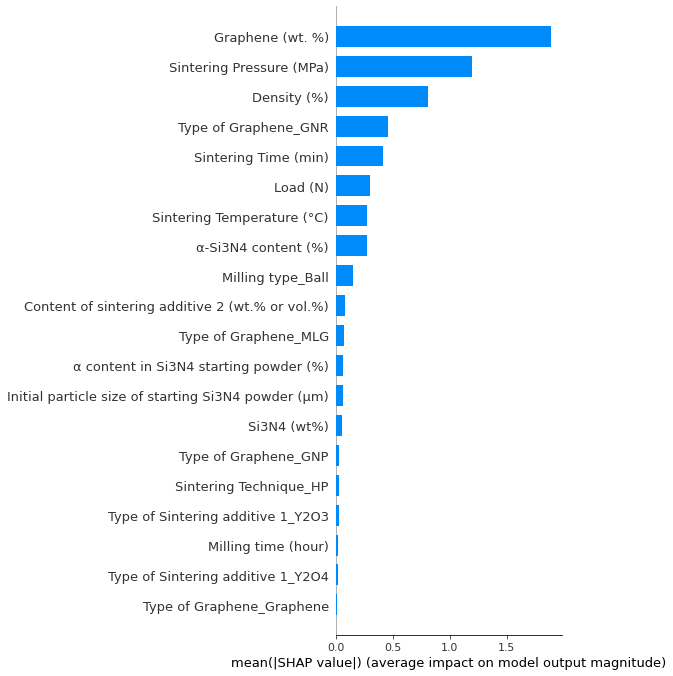

In [2]:
import xgboost as xgb
import shap

# Split the data into features and target
X = vickers_df.drop(columns=['Vickers hardness (GPa)'])
y = vickers_df['Vickers hardness (GPa)']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_encoded, y)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_encoded)

# Plot feature importance using SHAP
shap.summary_plot(shap_values, X_encoded, plot_type="bar")

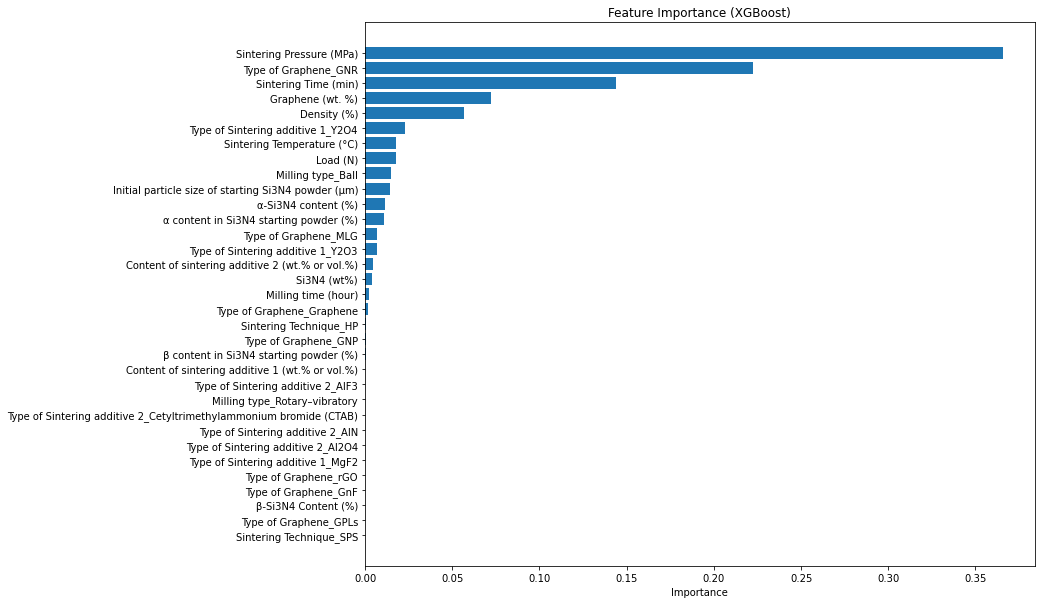

In [3]:
#optional
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_

# Sort features based on importance
sorted_idx = feature_importance.argsort()

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(X_encoded.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()

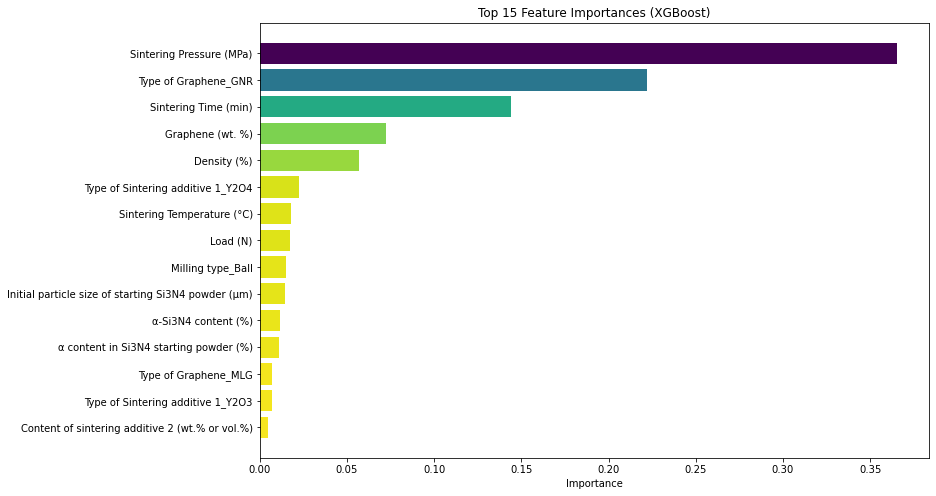

In [4]:
#options for top 15 parameters change
# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_encoded, y)

# Get feature importance from the model
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

# Define a threshold for filtering out less important features (e.g., keep top 15 features)
threshold = 15
top_sorted_idx = sorted_idx[-threshold:]
top_features = X_encoded.columns[top_sorted_idx]
top_importances = feature_importance[top_sorted_idx]

# Creating a fancy plot
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis_r(top_importances / max(top_importances))
bars = plt.barh(top_features, top_importances, color=colors)

# Adding a colorbar
#cbar = plt.colorbar()
#cbar.set_label('Feature Importance', rotation=270, labelpad=20)

plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (XGBoost)')
#plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


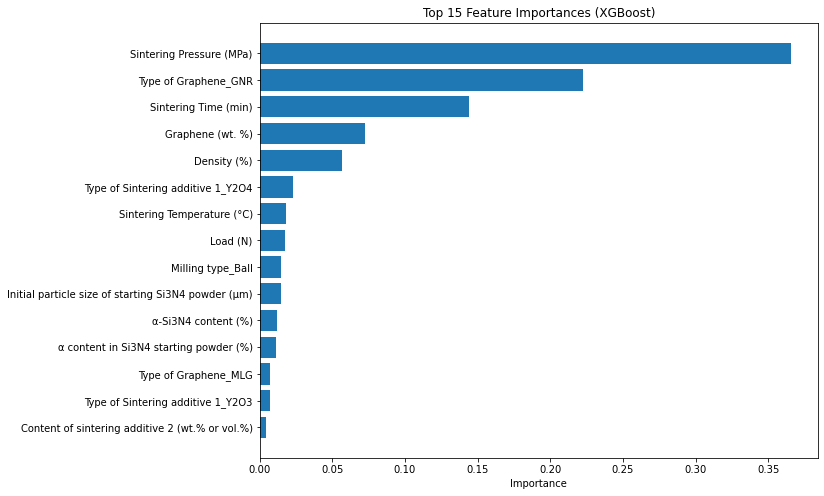

In [5]:
#optional for 15 top important
import matplotlib.pyplot as plt

# Retrain the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_encoded, y)
# Get feature importance from the model
feature_importance = model.feature_importances_


threshold = 15
top_sorted_idx = feature_importance.argsort()[-threshold:]

plt.figure(figsize=(10, 8))
plt.barh(X_encoded.columns[top_sorted_idx], feature_importance[top_sorted_idx])
plt.xlabel('Importance')
plt.title(f'Top {threshold} Feature Importances (XGBoost)')
plt.show()

#### Interpretability Analysis (below Graph)

with Beeswarm plot purpose is to visualize the values of features for a set of instances. This plot shows how each feature contributes to model predictions across instances, with points spread horizontally to prevent overlap. It helps understand feature importance and how features impact predictions.

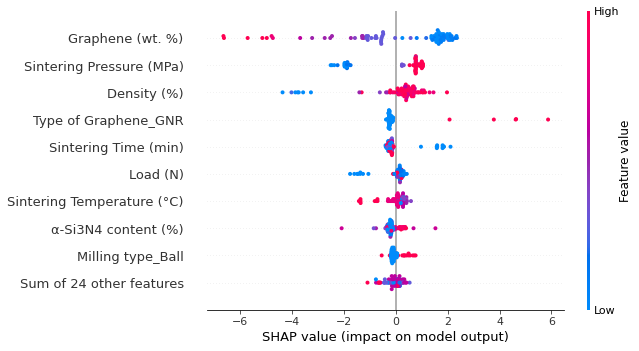

In [6]:
shap.plots.beeswarm(shap_values)

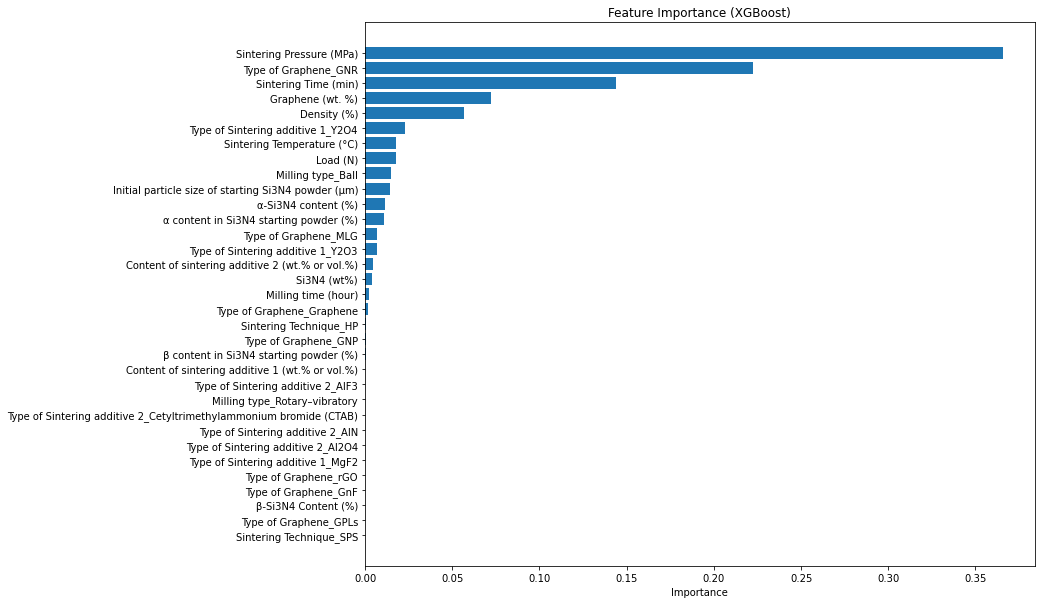

In [7]:

# Get feature importance from the model
feature_importance = model.feature_importances_

# Sort features based on importance
sorted_idx = feature_importance.argsort()

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.barh(X_encoded.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()


## <span style="color:#007acc">2) Distribution plot</span>

A) For target vickers hardness


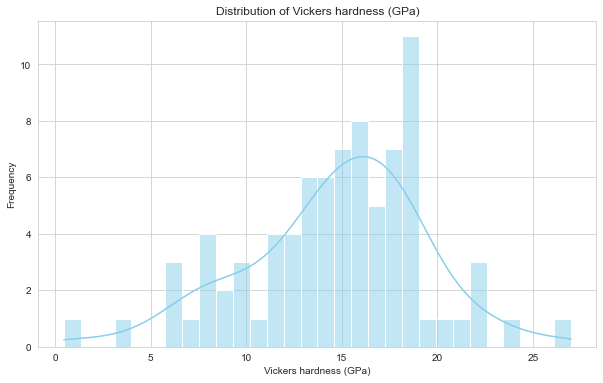

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel("Tribology table for ML.xlsx", sheet_name='Vickers Hardness')

# Set style
sns.set_style("whitegrid")

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Vickers hardness (GPa)'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Vickers hardness (GPa)')
plt.xlabel('Vickers hardness (GPa)')
plt.ylabel('Frequency')
plt.show()

B) for all numerical paremeters

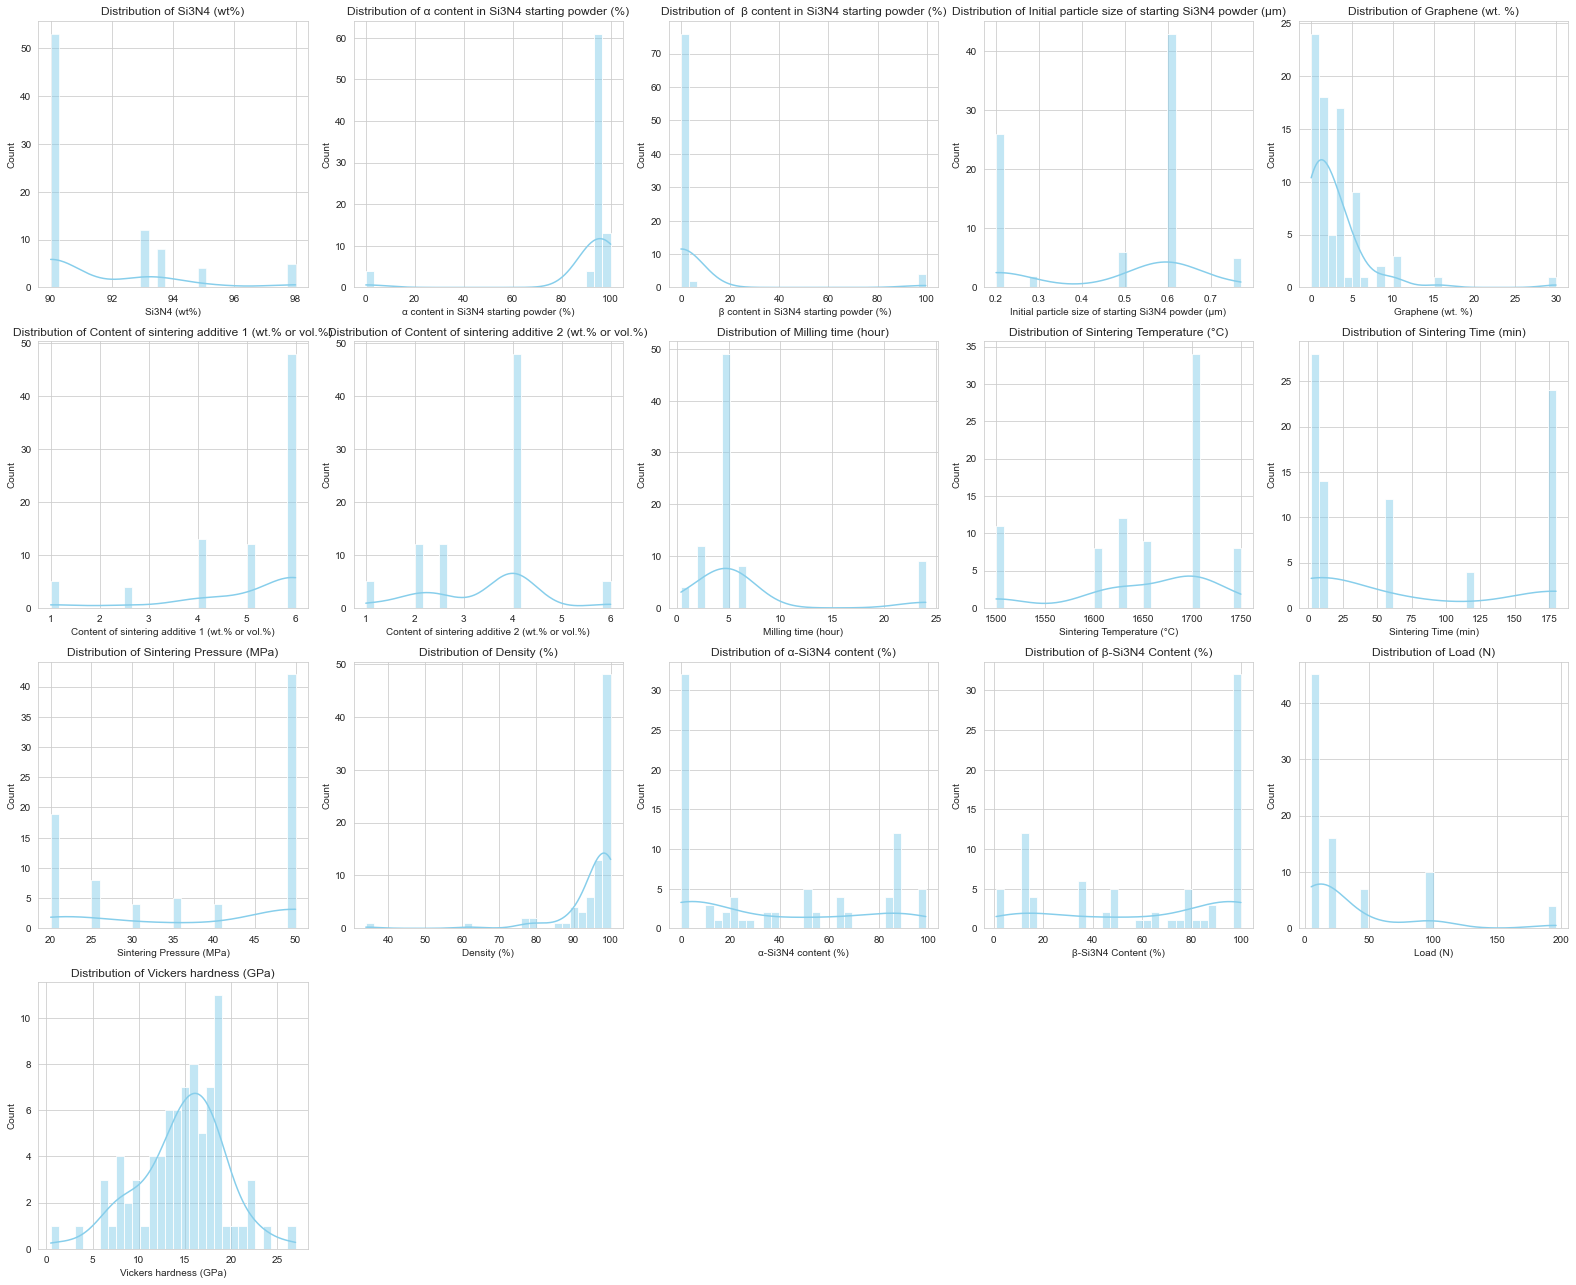

In [9]:
# Filter out non-numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
textual_columns = data.select_dtypes(include=['object']).columns.tolist()


# Plot distributions for each input variable
plt.figure(figsize=(22, 22))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')# change it to red/blue if you think is not good 
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

C) Distribution for all text columns

All other are numeric only below are textual columns

- Type of Graphene
- Type of Sintering additive 1
- Type of Sintering additive 2
- Milling type
- Sintering Technique

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

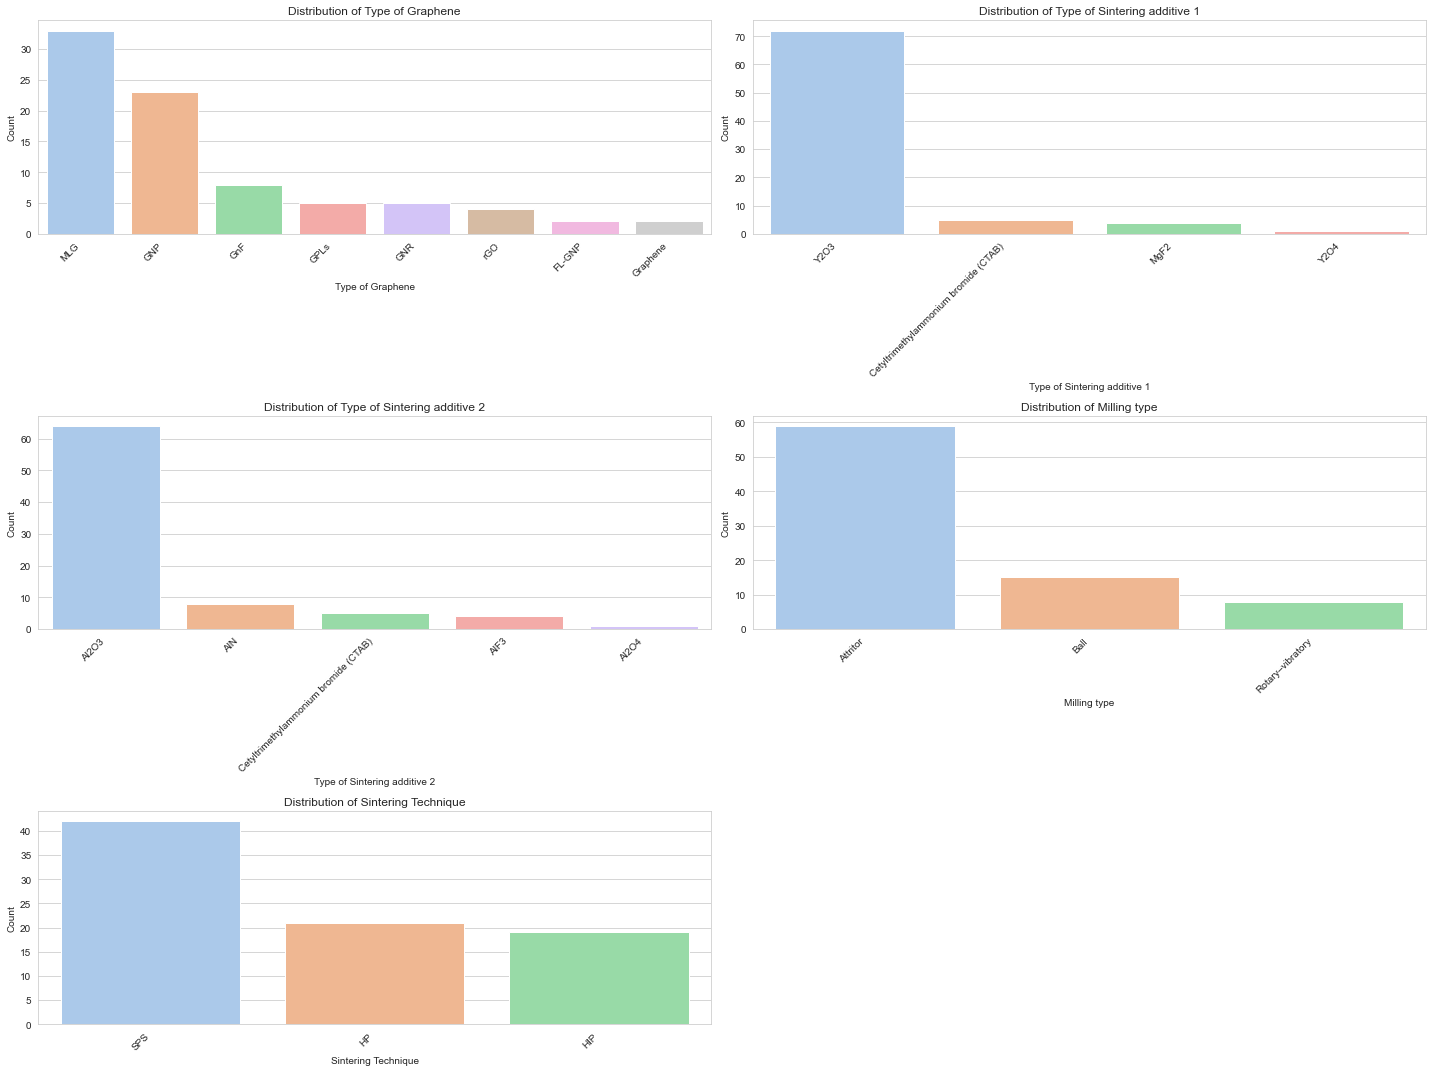

In [10]:
#optional
plt.figure(figsize=(20, 15))

for i, col in enumerate(textual_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data[col], palette='pastel', order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1440x2160 with 0 Axes>

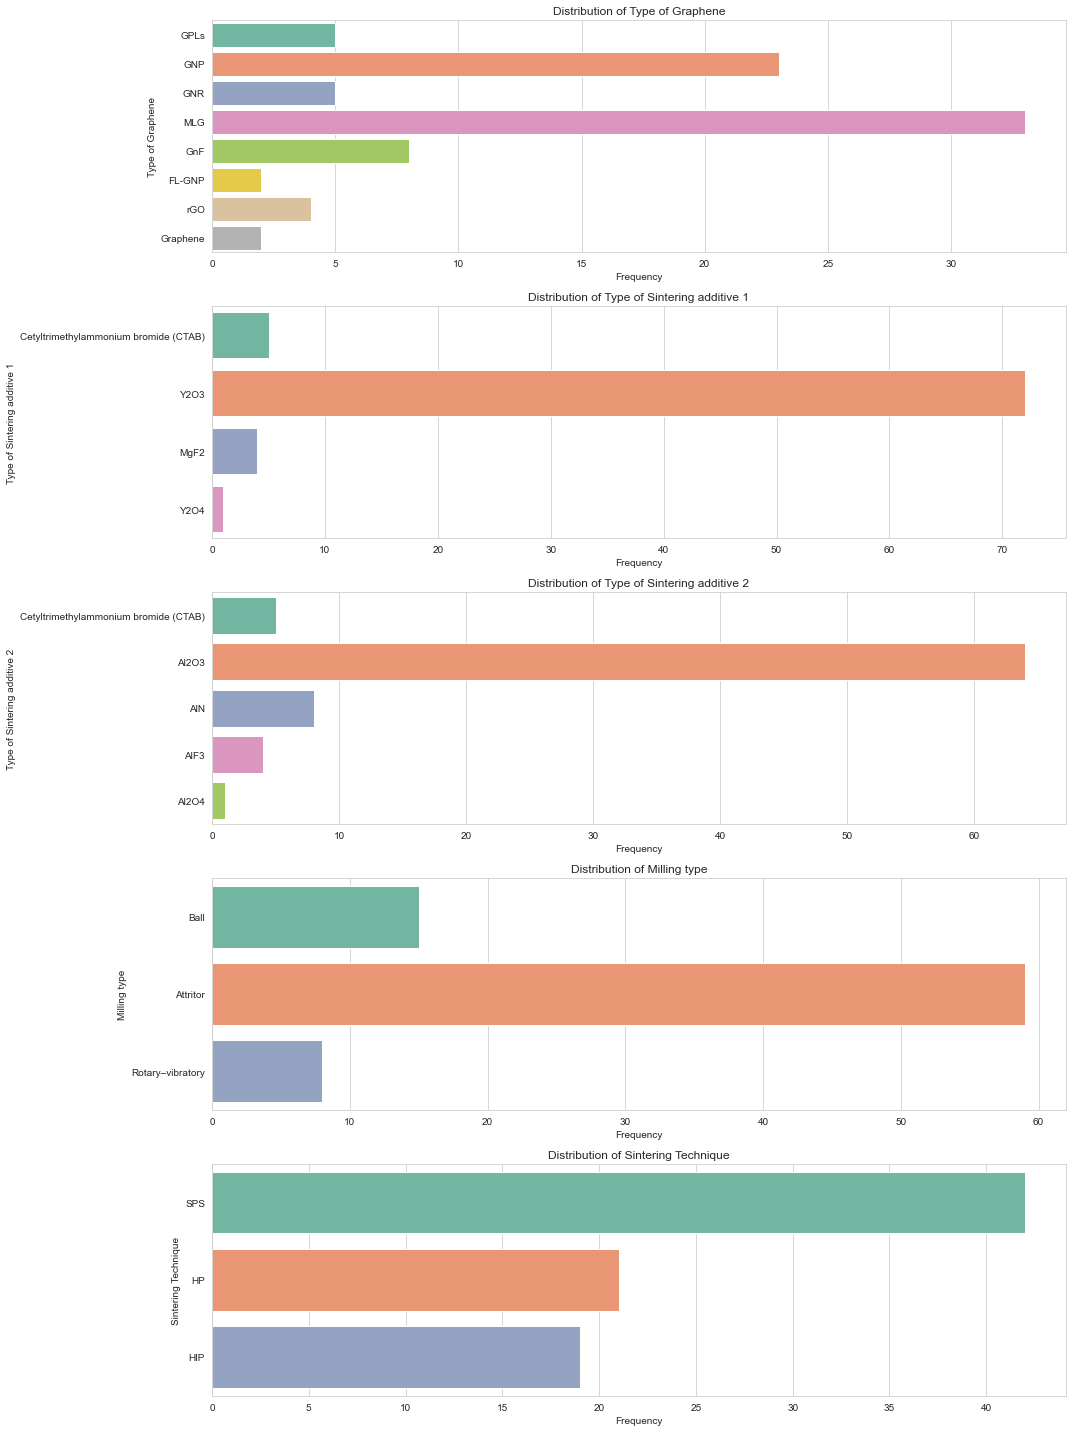

In [11]:
#optional

import matplotlib.pyplot as plt
import seaborn as sns
vickers_data = data

numerical_cols = vickers_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = vickers_data.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Remove the target column 'Vickers hardness (GPa)' from numerical columns
numerical_cols.remove('Vickers hardness (GPa)')

# Set the style and size
sns.set_style("whitegrid")
plt.figure(figsize=(20, 30))

# Plotting histograms for numerical columns
#for index, col in enumerate(numerical_cols, 1):
#    plt.subplot(len(numerical_cols) + len(categorical_cols), 2, index)
#    sns.histplot(vickers_data[col], kde=True, bins=30)
#    plt.title(f'Distribution of {col}')
#    plt.xlabel(col)
#    plt.ylabel('Frequency')

# Plotting bar plots for categorical columns
# Plotting bar plots for categorical columns in one figure
plt.figure(figsize=(15, 20))

for index, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, index)
    sns.countplot(y=vickers_data[col], palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()


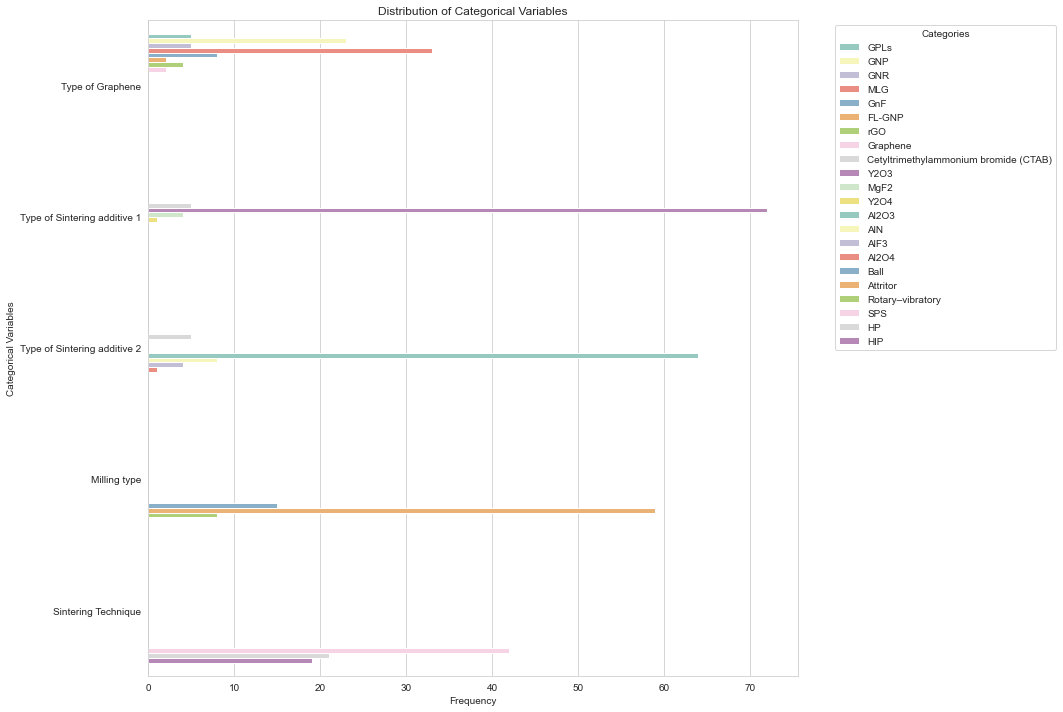

In [12]:
#optional
# Plotting all categorical columns in one collective bar plot
plt.figure(figsize=(15, 10))

# Concatenating all categorical data into a single long format for plotting
long_format_data = pd.melt(vickers_data[categorical_cols])

sns.countplot(y='variable', hue='value', data=long_format_data, palette="Set3")
plt.title('Distribution of Categorical Variables')
plt.xlabel('Frequency')
plt.ylabel('Categorical Variables')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## <span style="color:#007acc">3) Correlation Matrix</span>

What is heatmap:
The heatmap provides a visual representation of the correlation between various features in the dataset. 

Let's interpret some of the correlations:

- Strong positive correlations are shown in shades of positive values (light to dark orange), while strong negative correlations appear in shades of negative values (light to dark blue).

- The diagonal from the top-left to bottom-right represents the correlation of a feature with itself, so it's always 1.

- **Features like α content in Si3N4 starting powder (%) and β content in Si3N4 starting powder (%) have a strong negative correlation (close to -1) because they are complementary to each other. If one increases, the other decreases.

- **Sintering Temperature (°C) and Sintering Time (min) have a slightly positive correlation. This might indicate that with an increase in sintering temperature, there's also a tendency to increase the sintering time in some cases.

- **Vickers hardness (GPa) seems to have a slightly negative correlation with Graphene (wt. %), suggesting that as the weight percentage of Graphene increases, the Vickers hardness tends to decrease. However, it's essential to note that correlation doesn't imply causation.

- Other features have weaker correlations with Vickers hardness (GPa), implying they might not be as influential in determining the hardness.

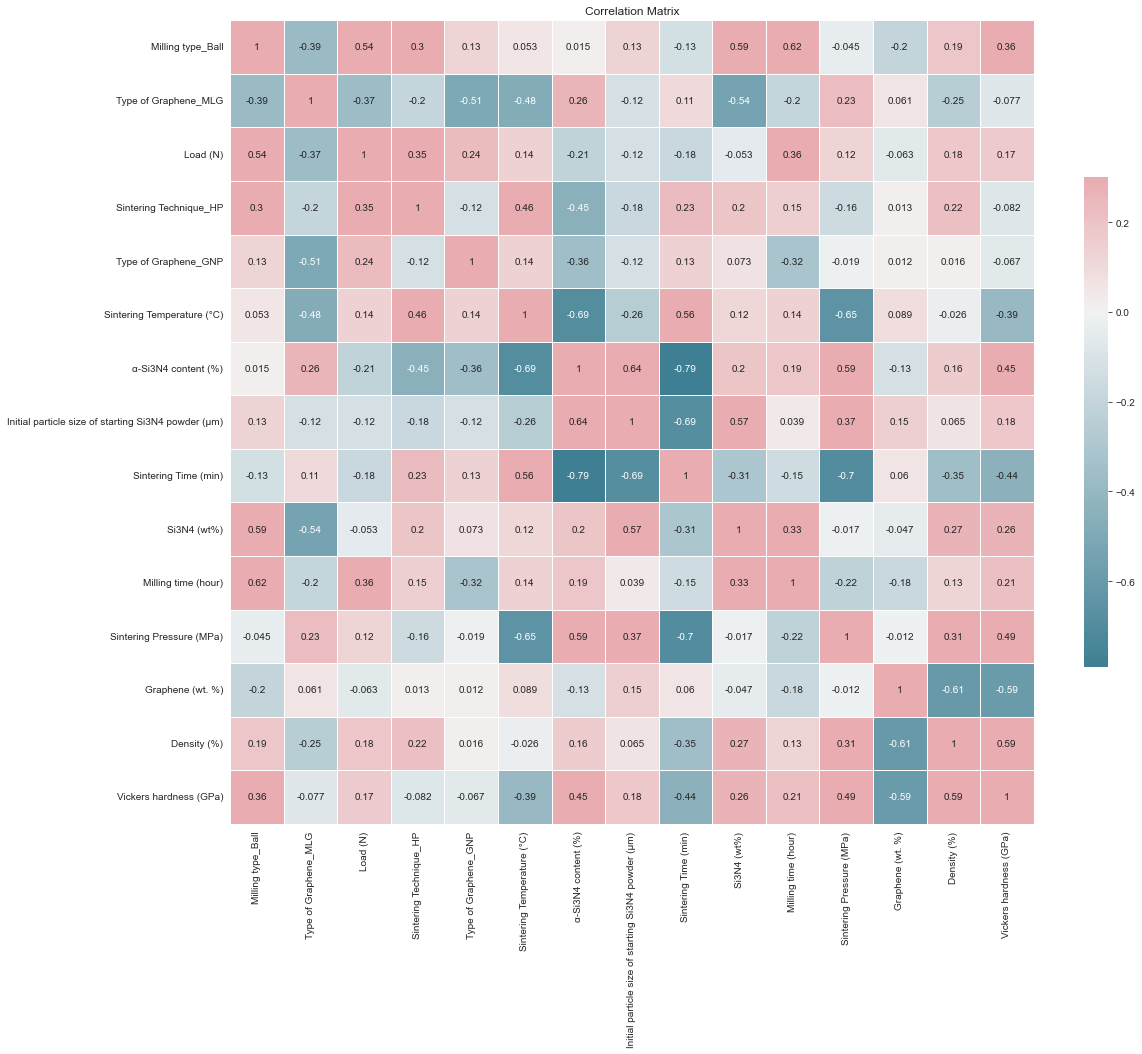

In [13]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

vickers_df = pd.read_excel("Tribology table for ML.xlsx", sheet_name='Vickers Hardness')
vickers_df  = pd.get_dummies(vickers_df, drop_first=True)
X = vickers_df.drop(columns=['Vickers hardness (GPa)'])
y = vickers_df['Vickers hardness (GPa)']

X_encoded = pd.get_dummies(vickers_df, drop_first=True)


# Train the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_encoded, y)

# Get feature importance from the model
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
sorted_idx = feature_importance.argsort()
# Define a threshold for filtering out less important features (e.g., keep top 15 features)
threshold = 15
top_sorted_idx = sorted_idx[-threshold:]
top_features = X_encoded.columns[top_sorted_idx]
top_importances = feature_importance[top_sorted_idx]


correlation_matrix = vickers_df[top_features].corr()

# Set up the figure and axes
plt.figure(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('correwlation.png', bbox_inches='tight')
plt.title('Correlation Matrix')
plt.show()

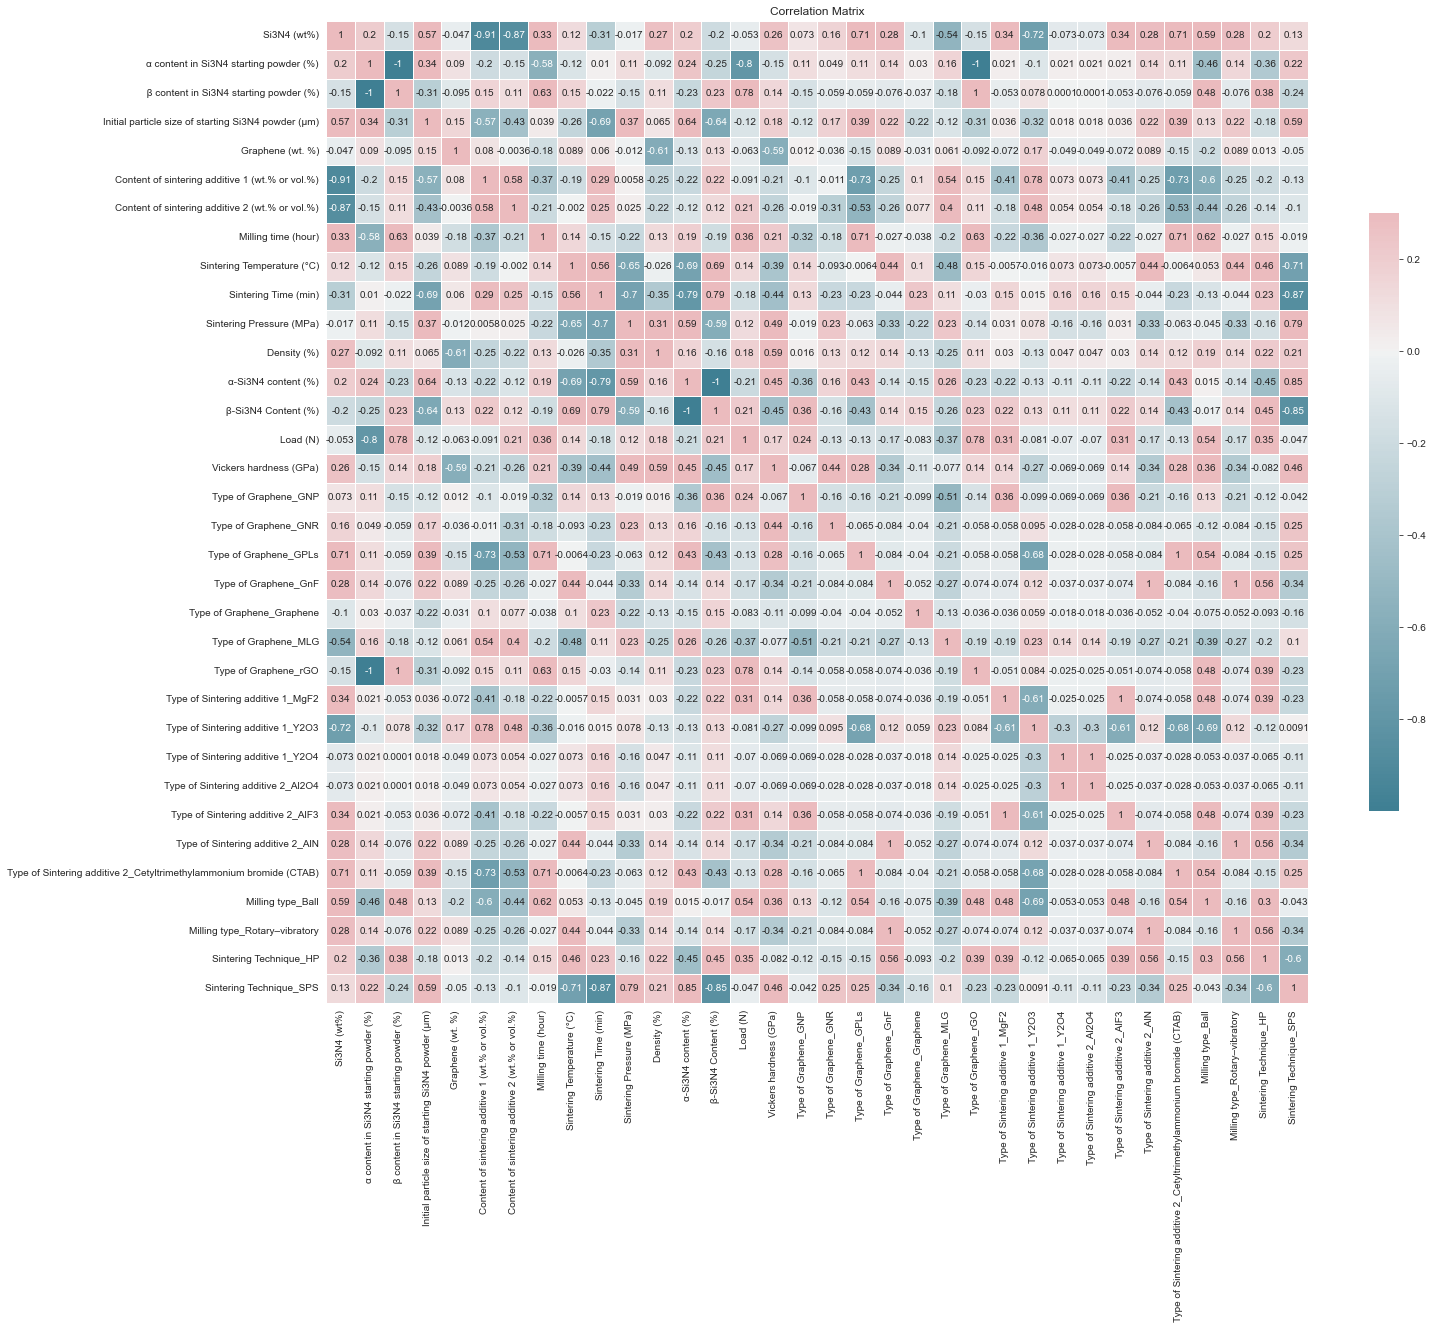

In [14]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

vickers_df = pd.read_excel("Tribology table for ML.xlsx", sheet_name='Vickers Hardness')

vickers_df = pd.get_dummies(vickers_df, drop_first=True)
correlation_matrix = vickers_df.corr()

# Set up the figure and axes
plt.figure(figsize=(22, 22))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('correwlation.png', bbox_inches='tight')
plt.title('Correlation Matrix')
plt.show()

# <span style="color:#007acc">Modelling (Testing evaluation in the end)</span>

In [15]:
# Identify text columns
text_columns = data.select_dtypes(include=['object']).columns.tolist()
# Create a copy of the dataset to apply target encoding
encoded_data = data.copy()

# Manually apply target encoding for each text column
for column in text_columns:
    means = encoded_data.groupby(column)['Vickers hardness (GPa)'].mean()
    encoded_data[column + '_encoded'] = encoded_data[column].map(means)

# Drop the original text columns
encoded_data = encoded_data.drop(columns=text_columns)
encoded_data.head()

Si3N4 (wt%)  α content in Si3N4 starting powder (%)  \
0         98.0                                   100.0   
1         98.0                                   100.0   
2         98.0                                   100.0   
3         98.0                                   100.0   
4         98.0                                   100.0   

    β content in Si3N4 starting powder (%)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Initial particle size of starting Si3N4 powder (μm)  Graphene (wt. %)  \
0                                               0.77            0.000000   
1                                               0.77            0.013665   
2                                               0.77            0.342146   
3                                               0.77            0.685358   
4                                               0.77            1.029641   

   Content of sintering additive 1 (wt.% or vol.%)  \
0                                              1.0   
1                                              1.0   
2                                              1.0   
3                                              1.0   
4                                              1.0   

   Content of sintering additive 2 (wt.% or vol.%)  Milling time (hour)  \
0                                              1.0                 24.0   
1                                              1.0                 24.0   
2                                              1.0                 24.0   
3                                              1.0                 24.0   
4                                              1.0                 24.0   

   Sintering Temperature (°C)  Sintering Time (min)  ...  Density (%)  \
0                        1650                     2  ...        100.0   
1                        1650                     2  ...         99.5   
2                        1650                     2  ...         99.7   
3                        1650                     2  ...         99.3   
4                        1650                     2  ...         99.6   

   α-Si3N4 content (%)  β-Si3N4 Content (%)  Load (N)  Vickers hardness (GPa)  \
0                 99.0                  1.0       9.8                    22.3   
1                 99.0                  1.0       9.8                    21.2   
2                 99.0                  1.0       9.8                    19.3   
3                 99.0                  1.0       9.8                    20.4   
4                 99.0                  1.0       9.8                    15.7   

   Type of Graphene_encoded  Type of Sintering additive 1_encoded  \
0                     19.78                                 19.78   
1                     19.78                                 19.78   
2                     19.78                                 19.78   
3                     19.78                                 19.78   
4                     19.78                                 19.78   

   Type of Sintering additive 2_encoded  Milling type_encoded  \
0                                 19.78                18.286   
1                                 19.78                18.286   
2                                 19.78                18.286   
3                                 19.78                18.286   
4                                 19.78                18.286   

   Sintering Technique_encoded  
0                    16.780714  
1                    16.780714  
2                    16.780714  
3                    16.780714  
4                    16.780714  

[5 rows x 21 columns]

In [16]:
from sklearn.model_selection import train_test_split

# Define target and features
X = encoded_data.drop(columns=['Vickers hardness (GPa)'])
y = encoded_data['Vickers hardness (GPa)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((65, 20), (17, 20))

### Result without Scalling 

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Dictionary to store the results
results = {
    "Model": [],
    "MSE": [],
    "R2 Score": [],
    "RMSE": []
}

# Train the models and get the results
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store the results
    results["Model"].append(name)
    results["MSE"].append(mse)
    results["R2 Score"].append(r2)
    results["RMSE"].append(rmse)

# Convert the results dictionary to a dataframe
results_df = pd.DataFrame(results)

results_df

Model       MSE  R2 Score      RMSE
0             Linear Regression  7.937555  0.621297  2.817367
1              Ridge Regression  6.623380  0.683997  2.573593
2              Lasso Regression  5.503736  0.737415  2.346004
3      Decision Tree Regression  6.703012  0.680198  2.589018
4      Random Forest Regression  4.917673  0.765377  2.217583
5  Gradient Boosting Regression  4.079259  0.805378  2.019718
6             XGBoost regressor  3.960096  0.811063  1.989999

### Result with Scalling

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

numeric_cols = encoded_data.select_dtypes(include=['float64', 'int64']).columns

# Normalize the numeric columns using Min-Max scaling

encoded_data[numeric_cols] = (encoded_data[numeric_cols] - encoded_data[numeric_cols].min()) / (encoded_data[numeric_cols].max() - encoded_data[numeric_cols].min())


# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "XGBoost regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Dictionary to store the results
results = {
    "Model": [],
    "MSE": [],
    "R2 Score": [],
    "RMSE": []
}

# Train the models and get the results
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the target for the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    # Store the results
    results["Model"].append(name)
    results["MSE"].append(mse)
    results["R2 Score"].append(r2)
    results["RMSE"].append(rmse)

# Convert the results dictionary to a dataframe
results_df = pd.DataFrame(results)

results_df

Model       MSE  R2 Score      RMSE
0             Linear Regression  7.937555  0.621297  2.817367
1              Ridge Regression  6.623380  0.683997  2.573593
2              Lasso Regression  5.503736  0.737415  2.346004
3      Decision Tree Regression  7.491224  0.642592  2.737010
4      Random Forest Regression  4.405742  0.789801  2.098986
5  Gradient Boosting Regression  3.842346  0.816681  1.960190
6             XGBoost regressor  3.960096  0.811063  1.989999

In Summary Scaling does not impact on our results

---
 

# <span style="color:#007acc">Final Model Analysis for paper Evaluation for Paper</span>
Use Below Analysis in out

<Figure size 1440x1440 with 0 Axes>

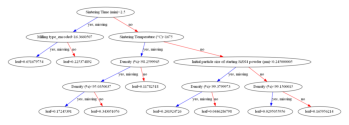

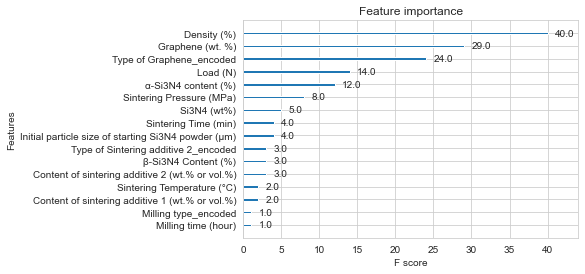

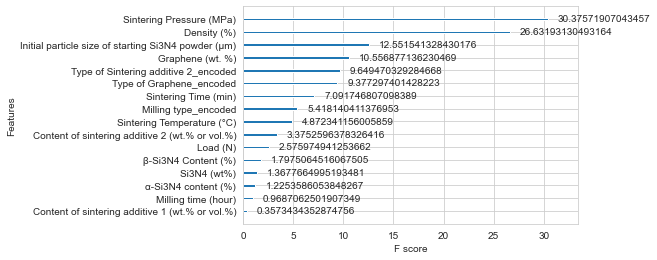

CPU times: total: 4min 24s
Wall time: 20.8 s


In [19]:
%%time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
import graphviz, os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

import warnings
warnings.filterwarnings('ignore')


# for XGBoost Best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
# Define a distribution of hyperparameters to sample from

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 30),  # Increased max_depth range
    'learning_rate': uniform(0.01, 0.3),
    'gamma': uniform(0, 1),
    'min_child_weight': randint(1, 20),  # Increased min_child_weight range
    'subsample': uniform(0.6, 0.9),  # Increased subsample range
    'colsample_bytree': uniform(0.6, 0.9),  # Increased colsample_bytree range
}


def evaluate_regression_models(data, target_column, test_size=0.3, random_state=42):
    # Extract features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    #only for XGBoost optimization code
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
    # Fit the randomized search to find the best model
    random_search.fit(X_train, y_train)
    # Get the best parameters and best estimator
    best_params = random_search.best_params_
    best_xgb_reg = random_search.best_estimator_

    # Initialize models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=1.0),
        "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
        "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=random_state),
        "SVR": SVR(kernel='linear', C=1.0),
        "Decision Tree Regression": DecisionTreeRegressor(),
        "Gradient Boosting Regression": GradientBoostingRegressor(),
        "XGBoost Regressor": best_xgb_reg#xgb.XGBRegressor(objective='reg:squarederror', random_state=random_state)
    }

    evaluation_results = []
    prediction_df = pd.DataFrame(columns=["True Values"])

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        
        #print(f'\nModel: {model_name}: \nTrue: {y_test.tolist()}\nPred:{[round(float(i), 1) for i in y_pred.tolist()]}')

        # Calculate RMSE and R-squared
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        if model_name == 'XGBoost Regressor':
            plt.figure(figsize=(20, 20)); ax = xgb.plot_tree(model, num_trees=12); 
            for line in ax.lines: line.set_linewidth(2)  # Adjust the number for desired thickness
            for text in ax.texts: text.set_weight('bold'); text.set_fontname('abadi'); text.set_fontsize(12)
            plt.savefig("xgboost_tree.png", dpi=300); plt.show()
            #import matplotlib.pyplot as plt; xgb.plot_tree(model, num_trees=0); plt.show()
            xgb.plot_importance(model); plt.savefig("xgboost_importance.png", dpi=300); plt.show()
            xgb.plot_importance(model, importance_type='gain'); plt.savefig("xgboost_marix_gain.png", dpi=300); plt.title(''); plt.show()
        # Create an evaluation summary
        evaluation_summary = {
            "Model Type": model_name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R-squared": r2,
        }

        evaluation_results.append(evaluation_summary)
        prediction_df[model_name] = y_pred.tolist()
    prediction_df["True Values"] = y_test.tolist()
    return evaluation_results, prediction_df

data = pd.read_excel('Tribology table for ML.xlsx', sheet_name='Vickers Hardness')
target_column = 'Vickers hardness (GPa)'

text_columns = data.select_dtypes(include=['object']).columns.tolist()# Identify text columns
encoded_data = data.copy()# Create a copy of the dataset to apply target encoding

#Encoding Part
# Manually apply target encoding for each text column
for column in text_columns:
    means = encoded_data.groupby(column)['Vickers hardness (GPa)'].mean()
    encoded_data[column + '_encoded'] = encoded_data[column].map(means)
encoded_data = encoded_data.drop(columns=text_columns)# Drop the original text columns

# Normalize the numeric columns using Min-Max scaling
#numeric_cols = encoded_data.select_dtypes(include=['float64', 'int64']).columns
#encoded_data[numeric_cols] = (encoded_data[numeric_cols] - encoded_data[numeric_cols].min()) / (encoded_data[numeric_cols].max() - encoded_data[numeric_cols].min())


summary,prediction_df = evaluate_regression_models(encoded_data, target_column)
results_df  = pd.DataFrame(summary)
prediction_df = pd.DataFrame(prediction_df)

In [20]:
results_df

Model Type       MAE       MSE      RMSE  R-squared
0             Linear Regression  2.085606  7.069040  2.658767   0.729026
1                         Ridge  2.095798  6.483750  2.546321   0.751462
2                         Lasso  2.124614  6.756355  2.599299   0.741012
3                    ElasticNet  2.098070  6.627639  2.574420   0.745946
4       Random Forest Regressor  2.000832  6.003506  2.450205   0.769871
5                           SVR  1.717702  4.681321  2.163636   0.820554
6      Decision Tree Regression  1.884400  5.705076  2.388530   0.781311
7  Gradient Boosting Regression  1.719136  4.683995  2.164254   0.820451
8             XGBoost Regressor  1.296301  3.261303  1.805908   0.874986

In [21]:
prediction_df# prediction comparision for each value of vikers hardness

True Values  Linear Regression      Ridge      Lasso  ElasticNet  \
0         12.20          13.139009  12.067084  10.942070   11.115697   
1         22.30          20.500398  20.482435  20.133599   20.548178   
2         15.30          16.360338  16.622277  16.081164   16.175998   
3         11.30          12.609447  11.665154  10.684753   10.809371   
4         15.60          16.431487  15.881030  16.107867   16.031454   
5         12.50          10.556650  11.191385  10.726363   10.860217   
6         18.20          21.522652  22.692769  20.624299   20.886830   
7         15.40          13.993203  13.355925  13.972621   13.623094   
8         15.70          20.096780  20.106321  19.838464   20.216689   
9         18.30          18.533926  18.181881  17.467126   17.604246   
10         3.38          10.720431   7.896291   7.231070    7.457730   
11         8.20          10.060399  10.669196   9.826449    9.881051   
12        13.30          13.868635  13.080581  13.485148   13.223052   
13         6.20           5.761972   9.445885   9.162323    9.089421   
14        11.80          13.816428  12.921819  13.470223   13.134409   
15        16.60          18.488652  18.460111  18.050148   18.269862   
16         9.69          13.575793  13.624115  13.908953   13.923220   
17        15.40          14.061371  13.406112  14.043302   13.683106   
18        15.10          12.546867  12.349818  12.842886   12.577238   
19         9.80          12.703597  12.785388  14.607743   14.117131   
20        27.00          21.925857  22.962116  20.837595   21.130975   
21        15.50          14.819884  13.996917  14.447266   14.451621   
22        18.90          16.488681  16.586313  16.261633   16.564299   
23        17.90          17.957533  17.946752  17.665672   17.825997   
24         6.50           8.379921   9.608421   9.216381    9.155051   

    Random Forest Regressor        SVR  Decision Tree Regression  \
0                   13.3205  12.693233                     11.80   
1                   20.9637  21.111825                     19.30   
2                   15.9102  16.488657                     16.30   
3                   13.3099  12.112204                     11.80   
4                   16.4396  15.351112                     16.80   
5                   13.5163  11.898202                     12.60   
6                   20.8984  22.494538                     22.10   
7                   14.6851  15.384824                     14.60   
8                   20.3185  20.510079                     20.40   
9                   17.9392  19.177647                     17.50   
10                   6.2686   4.380852                      0.46   
11                  10.5704  10.378403                      8.70   
12                  15.4160  14.743383                     16.40   
13                  10.0673   8.672090                      8.70   
14                  15.1962  14.576896                     14.60   
15                  17.9244  18.844946                     17.01   
16                  12.9236  11.324689                     13.37   
17                  14.9812  15.487902                     14.60   
18                  14.7050  13.503592                     14.60   
19                  12.8601  13.261220                     12.80   
20                  21.7041  22.938520                     22.10   
21                  15.3335  14.180434                     15.60   
22                  16.8782  17.343301                     16.30   
23                  18.5435  18.038270                     18.60   
24                   9.9973   8.939347                      8.70   

    Gradient Boosting Regression  XGBoost Regressor  
0                      12.477869          12.890997  
1                      20.126136          20.324097  
2                      15.478990          15.672783  
3                      12.392736          12.464146  
4                      16.102514          16.211433  
5                      12.762469      

## <span style="color:#007acc">Evaluation</span>

In [22]:
import plotly.graph_objects as go
data = results_df
trace_mae = go.Bar(x=data['Model Type'], y=data['MAE'], name='MAE', marker=dict(color='blue'))
trace_mse = go.Bar(x=data['Model Type'], y=data['MSE'], name='MSE', marker=dict(color='orange'))
trace_rmse = go.Bar(x=data['Model Type'], y=data['RMSE'], name='RMSE', marker=dict(color='green'))
trace_r_squared = go.Bar(x=data['Model Type'], y=data['R-squared'], name='R-squared', marker=dict(color='red'))

layout = go.Layout(
    title='MAE, MSE, RMSE and R-squared by Model Type',
    xaxis=dict(title='Model Type'),
    yaxis=dict(title='Error Value')
)

fig = go.Figure(data=[trace_mae, trace_mse, trace_rmse, trace_r_squared], layout=layout)
fig.show()

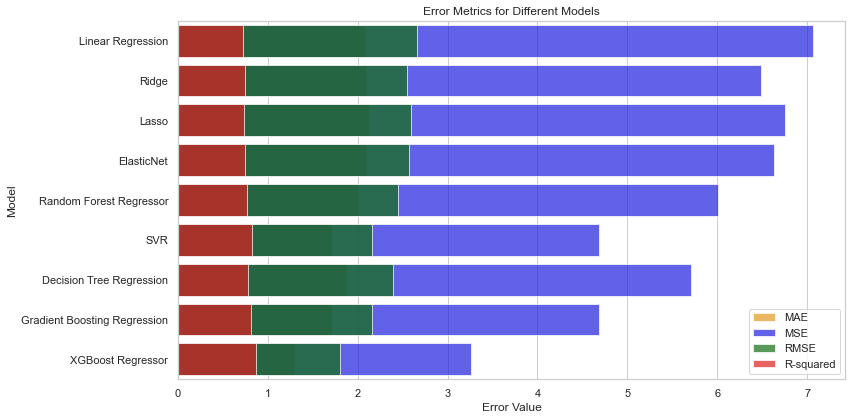

In [23]:
#optinal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = results_df
df['MAE'] = df['MAE'].astype(float)
df['MSE'] = df['MSE'].astype(float)
df['RMSE'] = df['RMSE'].astype(float)
df['R-squared'] = df['R-squared'].astype(float)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.barplot(x='MAE', y='Model Type', data=df, color='orange', label='MAE', alpha=0.7)
# Plot MSE
sns.barplot(x='MSE', y='Model Type', data=df, color='blue', label='MSE', alpha=0.7)
# Plot RMSE
sns.barplot(x='RMSE', y='Model Type', data=df, color='green', label='RMSE', alpha=0.7)
# Plot R-squared
sns.barplot(x='R-squared', y='Model Type', data=df, color='red', label='R-squared', alpha=0.7)

# Customize the plot
plt.title('Error Metrics for Different Models')
plt.xlabel('Error Value')
plt.ylabel('Model')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [24]:
#Optional
import plotly.express as px
import pandas as pd

# Sample data as a DataFrame
data = results_df

# Create a Plotly bar chart
fig = px.bar(data, x='Model Type', y=['MAE','MSE', 'RMSE', 'R-squared'],
             title='Error Metrics for Different Models',
             labels={'value': 'Error Value', 'variable': 'Error Type'},
             color_discrete_sequence=['orange','blue', 'green', 'red'])

fig.update_layout(xaxis_title='Model',
                  yaxis_title='Error Value',
                  xaxis_tickangle=-45,
                  legend_title='Error Type')
fig.show()

---
## <span style="color:#007acc">Text To add in paper</span>

### A) Exploring XGBoost Regression for Predictive Modeling

**Abstract:**
XGBoost (Extreme Gradient Boosting) is a powerful and versatile machine learning algorithm that has gained significant popularity in both research and industry due to its outstanding performance in various predictive modeling tasks. In this research paper, we delve into the details of XGBoost regression, a variant of XGBoost designed for regression problems. We discuss its fundamental principles, key hyperparameters, and practical considerations, highlighting its strengths and applications. Through empirical experiments on real-world datasets, we demonstrate the effectiveness of XGBoost regression in achieving accurate predictions, making it a valuable tool for predictive modeling tasks.

**1. Introduction:**
   - Introduce the context of predictive modeling and the importance of regression tasks in various fields, such as finance, healthcare, and marketing.
   - Briefly mention the significance of XGBoost as a prominent machine learning algorithm.
   - State the objective of the research paper: to provide an in-depth understanding of XGBoost regression.

**2. Background:**
   - Provide a brief overview of machine learning and regression as a supervised learning task.
   - Explain the concept of ensemble learning and boosting algorithms, which form the basis of XGBoost.
   - Mention some traditional regression algorithms and their limitations.

**3. XGBoost Overview:**
   - Explain the origin and evolution of XGBoost, including its development by Tianqi Chen and its popularity in data science competitions.
   - Describe the primary characteristics of XGBoost, such as its gradient boosting framework, which combines the predictions of multiple weak learners (typically decision trees) to improve model accuracy.
   - Highlight XGBoost's efficiency, scalability, and ability to handle large datasets.
   
**4. XGBoost Regression:**
   - Introduce XGBoost regression as a variant tailored for regression problems, where the goal is to predict a continuous target variable.
   - Discuss how XGBoost handles regression tasks by optimizing a loss function (e.g., mean squared error) and employing a regularization term to prevent overfitting.
   
**5. Key Hyperparameters:**
   - Provide an overview of essential hyperparameters in XGBoost regression, including:
     - `n_estimators`: The number of boosting rounds (trees) to train.
     - `max_depth`: The maximum depth of individual trees.
     - `learning_rate`: The step size for gradient descent.
     - `gamma`: The regularization term that controls tree complexity.
     - `min_child_weight`: The minimum sum of instance weights required in a child node.
     - `subsample`: The fraction of training data randomly sampled for each tree.
     - `colsample_bytree`: The fraction of features randomly sampled for each tree.
   - Explain the impact of these hyperparameters on model performance and overfitting.

**6. Practical Considerations:**
   - Discuss best practices for hyperparameter tuning using techniques like grid search or random search.
   - Address strategies for handling missing data, feature engineering, and model interpretation.
   - Emphasize the importance of cross-validation to assess model generalization.

**7. Experimental Results:**
   - Present the results of empirical experiments conducted on real-world datasets to demonstrate the effectiveness of XGBoost regression.
   - Compare XGBoost regression with other regression algorithms in terms of predictive accuracy, RMSE, and R-squared.

**8. Applications and Case Studies:**
   - Highlight real-world applications of XGBoost regression in domains such as finance, healthcare, and marketing.
   - Provide case studies or practical examples showcasing the successful deployment of XGBoost regression models.

**9. Conclusion:**
   - Summarize the key findings and contributions of the research paper.
   - Emphasize the strengths of XGBoost regression in achieving accurate predictions and handling regression tasks.
   - Discuss potential future research directions and extensions of the work.

**10. References:**
   - Cite relevant sources, papers, and documentation related to XGBoost and regression modeling.



### B) How Grid Search CV used for calculating best paremeters of XGBoost

1. **`n_estimators`:**
   - Range: randint(100, 1000)
   - Explanation: This hyperparameter determines the number of boosting rounds (trees) to train in the XGBoost model. A higher value allows the model to capture more complex patterns in the data but may increase the risk of overfitting. It controls the trade-off between model complexity and training time.

2. **`max_depth`:**
   - Range: randint(3, 30)
   - Explanation: `max_depth` represents the maximum depth of each decision tree in the ensemble. Increasing this value allows the trees to become more complex and potentially fit the training data better. However, setting it too high can lead to overfitting, while setting it too low may result in underfitting. The range provided allows for a wide exploration of tree depths.

3. **`learning_rate`:**
   - Range: uniform(0.01, 0.3)
   - Explanation: The learning rate controls the step size at each iteration during gradient boosting. A higher learning rate means faster convergence but may require a smaller number of estimators (`n_estimators`). Lower values can lead to more stable convergence but might require more boosting rounds. This parameter balances the trade-off between training speed and model accuracy.

4. **`gamma`:**
   - Range: uniform(0, 1)
   - Explanation: The `gamma` parameter is a regularization term that controls the complexity of individual trees. It specifies the minimum loss reduction required to make a further partition on a leaf node. Higher values of `gamma` make the algorithm more conservative by preventing it from creating overly deep trees, which can help in reducing overfitting.

5. **`min_child_weight`:**
   - Range: randint(1, 20)
   - Explanation: This parameter specifies the minimum sum of instance weight (hessian) needed in a child. It is used to control over-fitting. Higher values result in a more conservative algorithm that prevents small partitions of the data, reducing overfitting. It's particularly useful when dealing with imbalanced classes or noisy data.

6. **`subsample`:**
   - Range: uniform(0.6, 1.0)
   - Explanation: `subsample` controls the fraction of randomly selected training data that is used to grow each tree. Values closer to 1.0 use a larger portion of the data, which can lead to overfitting. Smaller values make the algorithm more robust by introducing randomness and preventing overfitting. It can also speed up training.

7. **`colsample_bytree`:**
   - Range: uniform(0.6, 1.0)
   - Explanation: This parameter specifies the fraction of features (columns) to be randomly sampled at each tree-building step. A higher value means that more features are considered at each split, potentially capturing more information but increasing the risk of overfitting. Smaller values promote feature selection and can make the model more robust.

These hyperparameters are crucial for tuning the XGBoost model's performance and controlling its behavior during training. 